### Linear Discriminant Analysis
Linear Discriminant Analysis was not a machine learning algorithm covered previously and was covered in the machinelearningmastery ebook, so this is from self-study and uses the Iris flower dataset.

In the final part of this notebook, we re-use the scaffold code provided by the serverless-ml Jupyter Notebooks on GitHub module 1 to test the ML model we have created here and plug it into the Gradio UI framework. This is useful for quick UI field generation for a predictive analytics service client.

This ML model handles multiple response variables representing three different flower varieties, not just two binary outputs e.g. Iris-setosa, Iris-Versicolour, Iris-Virginica.

Import pandas, sklearn and additional libraries for Label Encoding for the response variable - we will convert the categoric output label to a numeric encoding. We will again use the train:test split library and import our LinearDiscriminantAnalysis library from sklearn.

In [1]:
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from matplotlib import pyplot

#### EDA, ML Model training
For more information on the dataset source, refer to the below link from Kaggle datasets:
- https://www.kaggle.com/datasets/uciml/iris

In [2]:
iris_df = pd.read_csv("../datasets/Iris.csv")

In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris_df.shape

(150, 6)

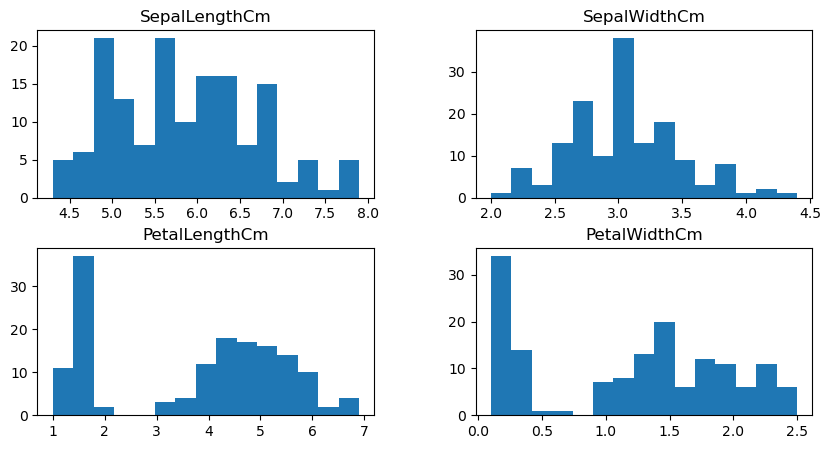

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# eda obtains the features from the dataframe 
features_no_output_label = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
iris_df[features_no_output_label].hist(bins=15, figsize=(10, 5), layout=(2, 2), grid=False);

In [7]:
iris_df.size

900

In [8]:
iris_df.ndim

2

In [9]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_df.sample(n=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
133,134,6.3,2.8,5.1,1.5,Iris-virginica
6,7,4.6,3.4,1.4,0.3,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor


Verify if any null values in the dataframe for a given data column.

In [11]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
X = iris_df.iloc[: , 1:5]

In [13]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
# data preprocessing: convert the categoric variables to numeric format
label_encoder = LabelEncoder()
iris_df['Species']= label_encoder.fit_transform(iris_df['Species'])

In [15]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [16]:
y = iris_df.iloc[: , -1]

In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

##### Create a train:test split on the dataset
Next, we define our train:test split using sklearn library. This lets us defined our supervised learning training set and a holdout test data subset. We will use a 33% portion of the dataset as a test set. We will use this to test the accuracy of the ML model on data it has not seen before in training and if it has overfit during training or can generalize to unseen data.

In [18]:
# split into train and test sets with sklearn native train_test_split 33% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [19]:
X_train.shape

(100, 4)

In [20]:
X_test.shape

(50, 4)

##### Machine Learning Model and Training
Define our Linear Discriminant Analysis machine learning model using the corresponding sklearn implementation library. Train the model using our earlier train:test split, using the train subset to train the ML model.

In [21]:
# define our linear discriminant analysis ml model
lda_clf = LinearDiscriminantAnalysis()

In [22]:
lda_clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

##### Linear Discriminant Analysis Model: Run Predictions, Evaluate Performance

In [23]:
# run prediction on test dataset
lda_clf.predict(X_test)

array([2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 1,
       2, 2, 0, 2, 2, 1])

In [24]:
lda_clf.score(X_test, y_test)

0.98

In [25]:
# To disable the json data structure output for pretty-print in notebook via print() function, set output_dict=False
y_pred = lda_clf.predict(X_test)
metrics = classification_report(y_test, y_pred, output_dict=False)

In [26]:
print(metrics)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        18
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [27]:
cm = confusion_matrix(y_test, y_pred)

In [28]:
cm

array([[17,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 15]])

Below is a useful sklearn confusion matrix display utility plot. I always refer to it ever I need to check the array dimensions for true label, predicted labels. Seaborn is used later for an alternative display plot with text labels.

- Row 1 is True Setosa and column 1 is predicted Setosa
- Row 2 is True Versicolor and column 2 is predicted Versicolor
- Row 3 is True Virginica and column 3 is predicted Virginica

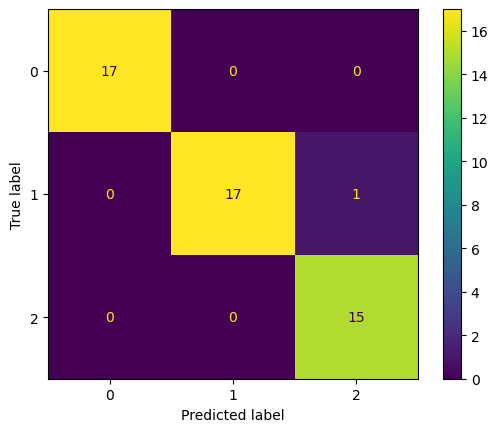

In [29]:
ConfusionMatrixDisplay(cm).plot()

<AxesSubplot:>

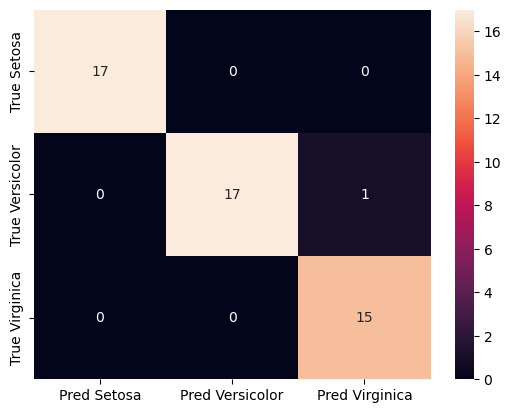

In [30]:
# format below for confusion matrix is based on serverless-ml course module 1 example on GitHub
df_confusion_matrix = pd.DataFrame(cm, ['True Setosa', 'True Versicolor', 'True Virginica'],
                     ['Pred Setosa', 'Pred Versicolor', 'Pred Virginica'])

sns.heatmap(df_confusion_matrix, annot=True)

##### Gradio User Interface Layer
In this section, we add a user interface layer. While we can create synthetic data functions in Python code to test the ML model, it helps for a human stakeholder to be able to test out a machine learning model in a web browser, especially when evaluating a prototype. This was a really nice utility demonstrated on the [serverless-ml MLOps](https://github.com/niallguerin/serverless-ml-course/tree/main/src/01-module) course.

The below code re-uses the serverless-ml GitHub course module 1 source code and makes only a minor tweak to read the image from my own GitHub repository.

In [ ]:
# reuses template code from the serverless-ml course to scaffold the gradio UI
import gradio as gr
import numpy as np
from PIL import Image
import requests

def convert_label(label_num):
    if(label_num == 0):
        return "Setosa"
    if(label_num == 1):
        return "Versicolor"
    if(label_num == 2):
        return "Virginica"

def iris(sepal_length, sepal_width, petal_length, petal_width):
    input_list = []
    input_list.append(sepal_length)
    input_list.append(sepal_width)
    input_list.append(petal_length)
    input_list.append(petal_width)
    # 'results' is a list of predictions returned as the label.
    results = lda_clf.predict(np.asarray(input_list).reshape(1, -1))
    # We add '[0]' to the result of the transformed 'results', because 'results' is a list, and we only want 
    # the first element.
    flower_type = convert_label(results)
    flower_url = "https://raw.githubusercontent.com/niallguerin/serverless-ml-course/main/src/01-module/assets/" + flower_type + ".png"
    img = Image.open(requests.get(flower_url, stream=True).raw)            
    return img
        
demo = gr.Interface(
    fn=iris,
    title="Iris Flower Predictive Analytics",
    description="Experiment with sepal/petal lengths/widths to predict which flower it is. This machine learning model uses linear discriminant analysis.",
    allow_flagging="never",
    inputs=[
        gr.inputs.Number(default=1.0, label="sepal length (cm)"),
        gr.inputs.Number(default=1.0, label="sepal width (cm)"),
        gr.inputs.Number(default=1.0, label="petal length (cm)"),
        gr.inputs.Number(default=1.0, label="petal width (cm)"),
        ],
    outputs=gr.Image(type="pil"))

demo.launch(share=False)

/Users/niallguerin/opt/anaconda3/lib/python3.9/site-packages/gradio/inputs.py:58: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Users/niallguerin/opt/anaconda3/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7865


#### Web References
- https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
- https://github.com/featurestoreorg/serverless-ml-course
- https://gradio.app/guides/